In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
image = cv2.imread('/home/eric/data/Military/m_patch_5.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

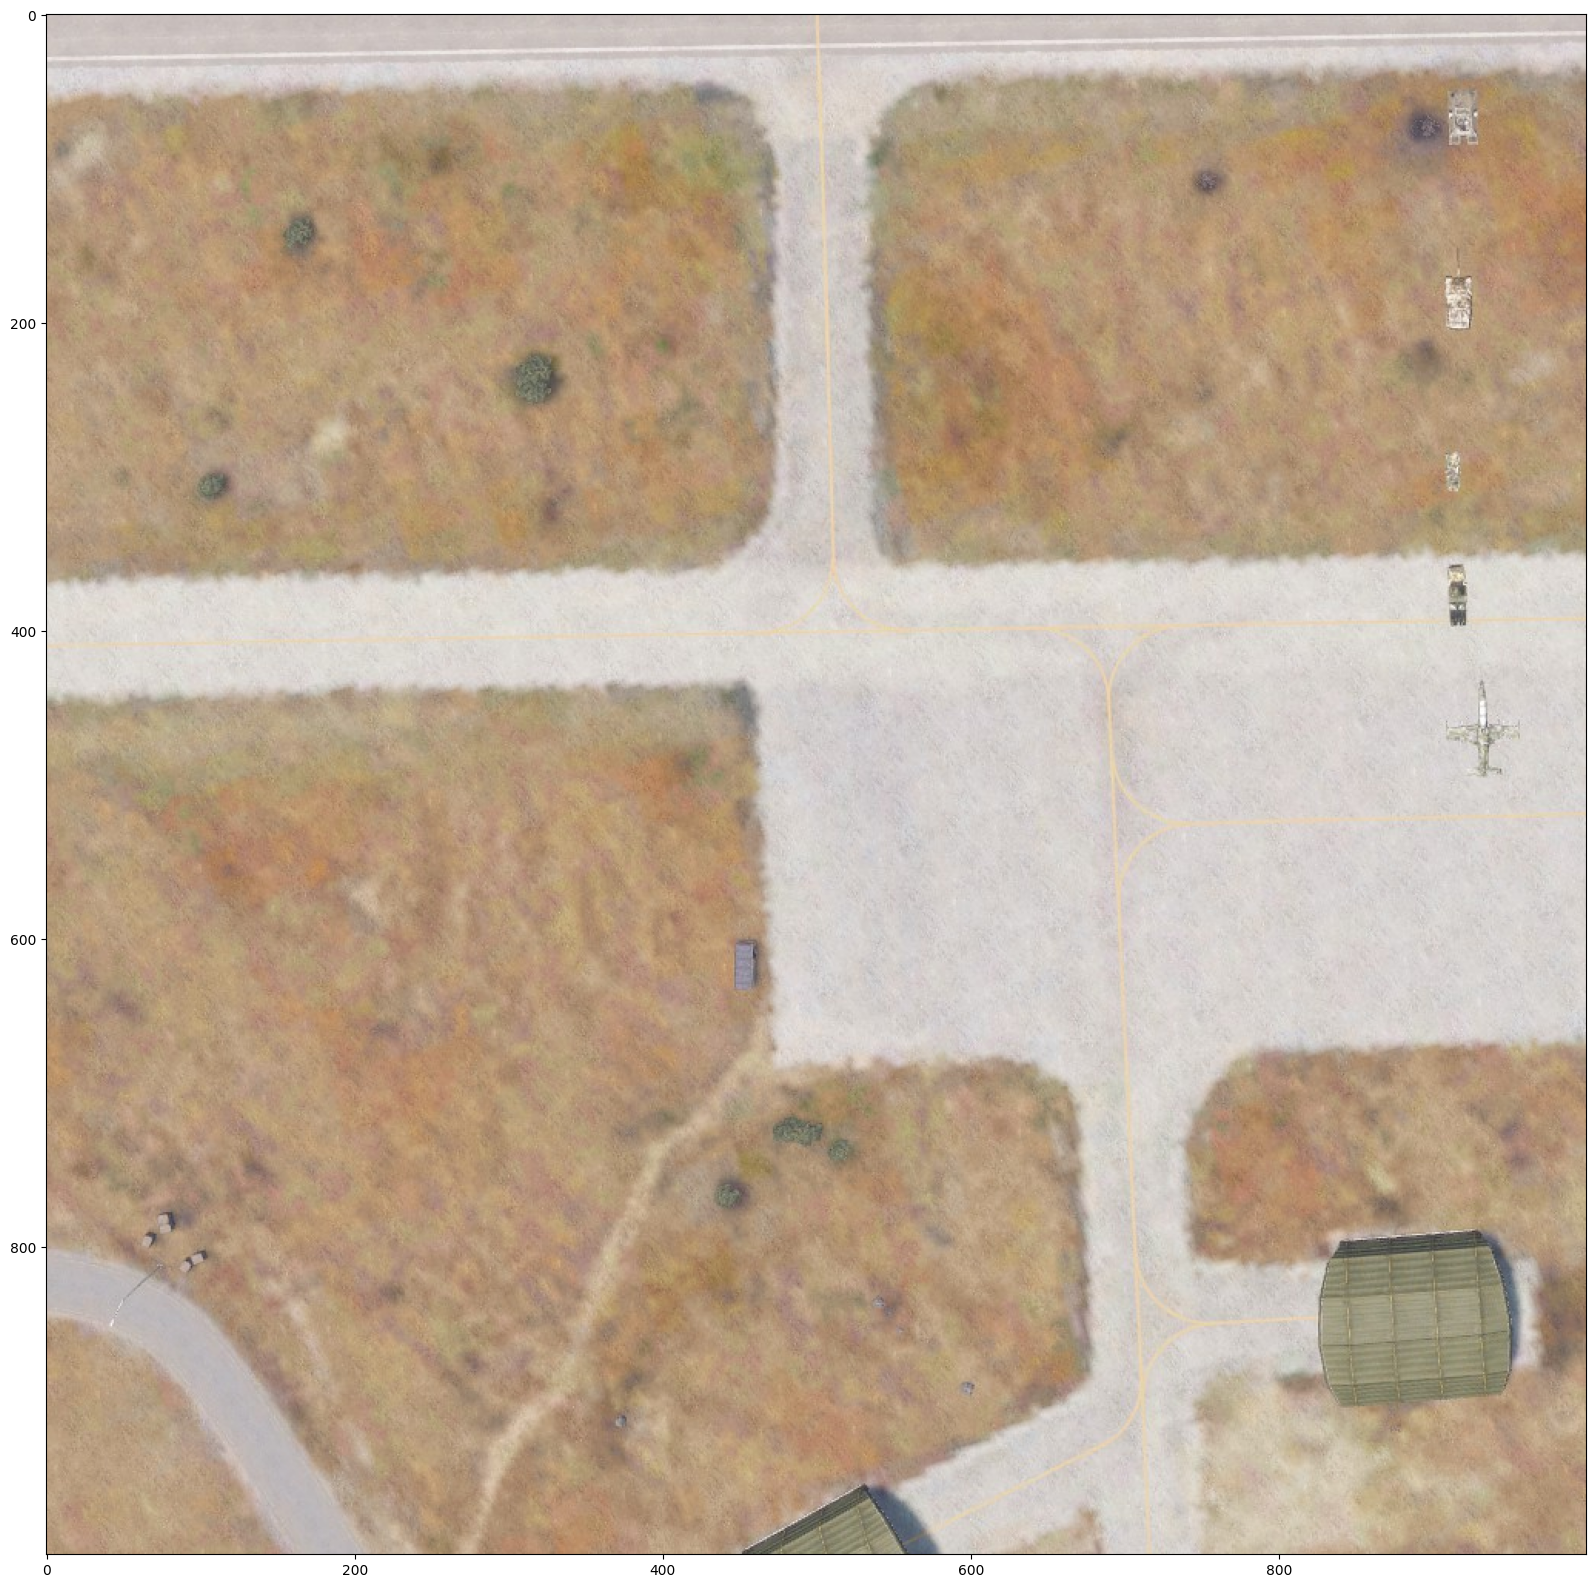

In [3]:
plt.figure(figsize=(35,20))
plt.imshow(image)
plt.axis('on')
plt.show()

In [8]:
mask = cv2.imread('/home/eric/data/Military/mask_1.png')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

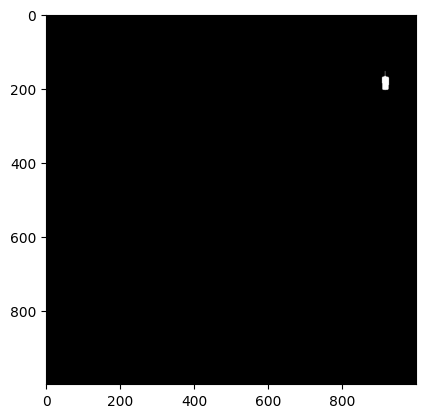

In [9]:
plt.imshow(mask)

In [17]:
sum(sum(mask == 255))

array([661, 661, 661])

In [73]:
# Load the original image and the binary mask
from PIL import Image
image = Image.open("/home/eric/data/Military/m_patch_5.png").convert("RGB")  # Ensure the image is in RGB mode
mask = Image.open("/home/eric/data/Military/mask_1.png").convert("L")      # Load mask in grayscale (L mode)

# Convert images to numpy arrays
image_np = np.array(image)
mask_np = np.array(mask)

# Create an alpha channel from the mask
alpha_channel = np.where(mask_np == 255, 255, 0).astype(np.uint8)  # 255 for object, 0 for background

# Stack the image array with the alpha channel to get an RGBA image
image_with_alpha = np.dstack((image_np, alpha_channel))

# Convert the resulting array back to an image
image_with_alpha_pil = Image.fromarray(image_with_alpha, mode="RGBA")

# Save or display the result
image_with_alpha_pil.save("/home/eric/data/prompt_mixing/image_with_alpha.png")

#--- crop the position

# Find coordinates where the mask is 255
rows = np.any(mask_np == 255, axis=1)  # Rows where mask has 255
cols = np.any(mask_np == 255, axis=0)  # Columns where mask has 255
ymin, ymax = np.where(rows)[0][[0, -1]]
xmin, xmax = np.where(cols)[0][[0, -1]]

# Crop the image using the bounding box
cropped_image = image_with_alpha[ymin:ymax+1, xmin:xmax+1]
cropped_mask = mask_np[ymin:ymax+1, xmin:xmax+1]

# Convert the cropped array back to an image and save or display it
cropped_image = Image.fromarray(cropped_image)
cropped_image.save("/home/eric/data/prompt_mixing/image_with_alpha_cropped.png")

# Convert the cropped array back to an image and save or display it
cropped_mask = Image.fromarray(cropped_mask)
cropped_mask.save("/home/eric/data/prompt_mixing/image_with_alpha_cropped_mask.png")

filename /home/eric/data/Military/m_patch_5.png
filename /home/eric/data/Military/mask_1.png


In [74]:
cropped_image

In [75]:
cropped_mask

In [46]:
cropped_image.size

(19, 52)

In [47]:
cropped_image_np = np.asarray(cropped_image)

In [ ]:
cropped_image_np

(52, 19, 4)

In [81]:
import random
from PIL import Image, ImageDraw

background = "/home/eric/data/Military/m_patch_8.png"
back_img = Image.open(background)
width, height = back_img.size
mask = Image.new("L", (width, height), 0)  # "L" mode for grayscale
#draw = ImageDraw.Draw(mask)

# Define patch size
patch_size = 200  # For a 10x10 grid on a 1000x1000 image

# Iterate over the 10x10 grid
for i in range(10):
    for j in range(10):
        # Calculate the top-left corner for each patch
        x = i * patch_size
        y = j * patch_size
        
        #--------------------
        # rotate
        random_angle = random.uniform(0, 360)
        rotated_image = cropped_image.rotate(random_angle, resample=Image.BICUBIC, expand=True)
        rotated_mask  = cropped_mask.rotate(random_angle, resample=Image.BICUBIC, expand=True)
        
        #--------------------
        
        # Paste the cropped image onto the current patch position using its alpha channel as a mask
        back_img.paste(rotated_image, (x, y), mask=rotated_image)
        mask.paste(rotated_mask, (x,y), mask=rotated_mask)
        
back_img.save("/home/eric/data/Military/final_image_with_rotated_patches.png")
mask.save("/home/eric/data/Military/final_mask.png")

filename /home/eric/data/Military/m_patch_8.png


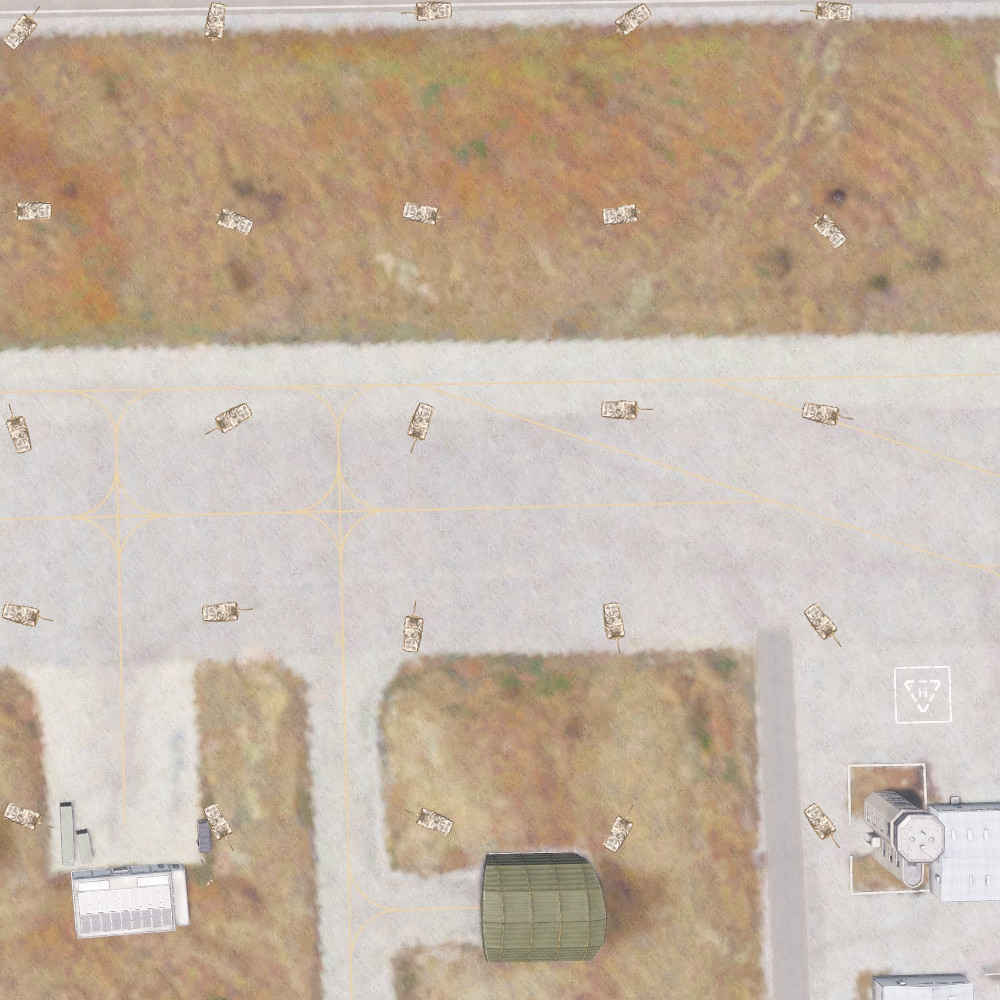

In [79]:
back_img

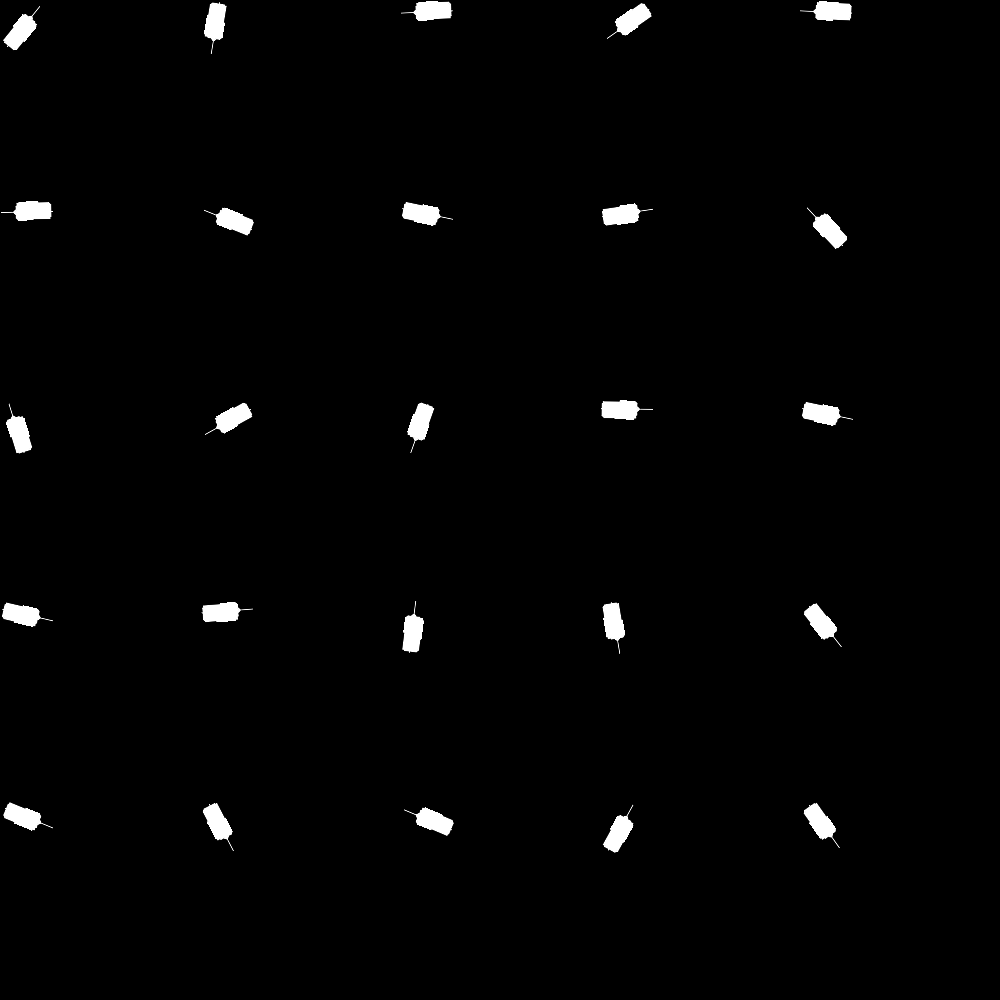

In [80]:
mask

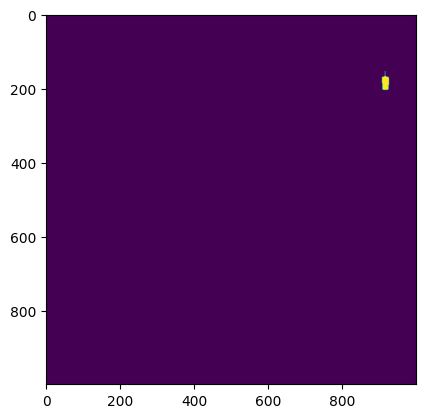

In [72]:
plt.imshow(mask)